# 1次元入力の線形回帰モデル

In [3]:
# list 3-1-(1) データを作成する

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

dt = datetime.datetime.now()

# 小数点以下の表示桁数を3桁にする (A)
np.set_printoptions(precision=3, suppress=True)
plt.rcParams['font.size'] = 14              # フォントサイズを設定 (B)
plt.rcParams['figure.figsize'] = (7, 4)     # 図のサイズ指定 (C)

n = 100                              # データ数
noise = 5                           # ノイズの大きさ
np.random.seed(3)                   # 乱数のseedを指定
xs = np.random.rand(n) * 30         # xs(気温)を一様乱数で決める
ts = (0.1 * xs) ** 4 + 1 * xs + 50 + np.random.randn(n) * noise    # ts(売り上げ)を決める (D)
x_range = (0, 30)                   # 表示用のxの範囲
t_range = (30, 140)                 # 表示用のtの範囲

print('xs', xs)
print('')
print('ts', ts)
print('time_stump', dt)

xs [16.524 21.244  8.727 15.325 26.788 26.889  3.768  6.217  1.544 13.224
  0.896 13.705 19.474  8.355 20.288 17.726  0.719 16.766  7.778 12.453
  8.506 20.794 13.214  4.706 16.339 23.409  9.191  6.659 11.639 28.092
 29.28  20.172 27.085 25.373 11.34   2.767 19.602 16.735 10.847  6.752
 12.196 14.068  8.077  8.754 13.731 25.816 17.588  8.505  8.339 13.639
  6.162  6.041 15.421  2.617 14.508 10.865 21.231 22.402 20.733 20.675
 11.208 20.044 10.195 17.184  9.774 13.354  1.846  7.28  29.148  6.918
 20.744 19.514 21.718 14.253 17.9    2.009  2.177  5.969  4.556  3.003
  3.879 16.598  5.634 28.563 20.448 16.231 21.215  7.917 27.802 25.176
 21.79  14.407 25.263 22.343 19.81  27.419 19.01  10.978 16.585  5.891]

ts [ 77.049  87.424  60.033  76.68  128.166 124.719  39.209  51.508  48.589
  63.701  46.096  69.119  80.984  58.295  90.624  73.321  49.218  85.457
  62.515  58.39   58.63   92.313  72.429  55.5    70.814  99.787  63.13
  58.421  60.891 139.419 150.697  90.351 127.452 119.248  67.251

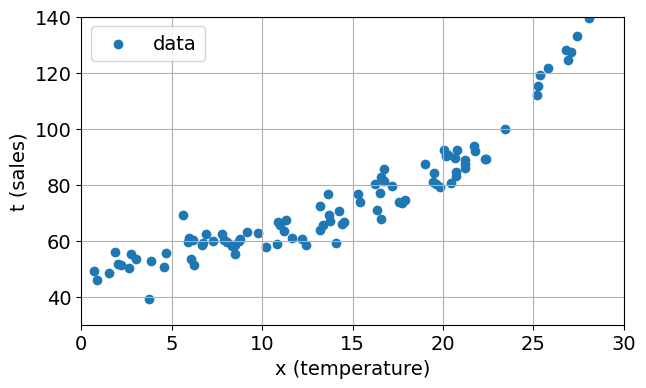

In [4]:
# list 3-1-(2) データーをプロット表示する

plt.scatter(xs, ts, label='data')           # 分布の表示 (A)

def plt_setting():                          # グラフの調整の関数定義 (B)
    plt.legend()
    plt.xlim(x_range)
    plt.ylim(t_range)
    plt.xlabel('x (temperature)')
    plt.ylabel('t (sales)')
    plt.grid(axis='both')

plt_setting()                               # グラフの調整実行 (C)
plt.show()

In [6]:
# list 3-1-(3) 線形回帰モデルを定義する

def linear_reg(x, w0, w1):
    y = w0 * x + w1
    return y

print(linear_reg(10, 1, 40))                        # (A)
print(linear_reg(np.array([10, 20, 30]), 1, 40))    # (B)

50
[50 60 70]


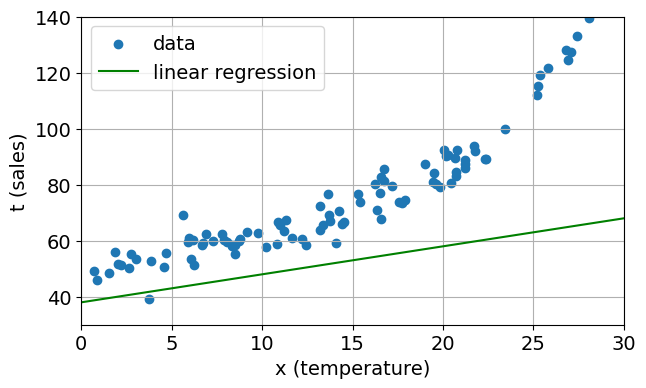

In [7]:
# list 3-1-(4) 線形回帰モデルをグラフ表示する

xs_pred = np.linspace(x_range[0], x_range[1], 50)   # (A)
ys_pred = linear_reg(xs_pred, w0=1, w1=38)          # (B)

plt.scatter(xs, ts, label='data')
plt.plot(xs_pred, ys_pred, 'g', label='linear regression')
plt_setting()
plt.show()

In [5]:
# list 3-1-(5) 線形回帰モデルのMSEを計算する

def mse_linear_reg(xs, ts, w0, w1):
    ys = linear_reg(xs, w0, w1)             # モデルの予測 (A)
    mse = np.mean((ts - ys) ** 2)           # MSEの計算 (B)
    return mse 

mse = mse_linear_reg(xs, ts, w0=1, w1=38)
print(f'MSE = {mse:.3f}')

MSE = 718.228


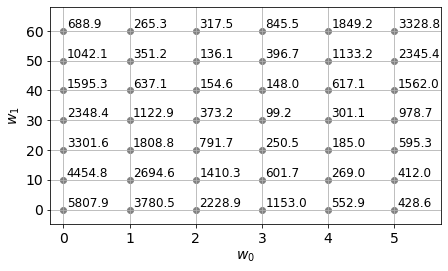

In [6]:
# 図3-5　本書での掲載はなし
w0_reso = 6
w1_reso = 7
w0s = np.linspace(0, 5, w0_reso)        # w0の範囲
w1s = np.linspace(0, 60, w1_reso)       # w1の範囲
mse = np.zeros((w1_reso, w0_reso))      # MSEを格納する2次元配列
for w0 in w0s:
    for w1 in w1s:
        # MSEの計算
        mse = mse_linear_reg(xs, ts, w0, w1)
        plt.scatter(w0, w1, color='gray')
        plt.text(w0 + 0.05, w1 + 1, '%.1f' % mse, fontsize=12)
plt.xticks(w0s)
plt.yticks(w1s)
plt.ylabel('$w_1$')
plt.xlabel('$w_0$')
plt.ylim(-5, 68)
plt.xlim(-0.2, 5.7)
plt.grid(axis='both')
plt.show()

グリッドサーチ: w0=2.755, w1=35.510 のとき最小MSE 88.391


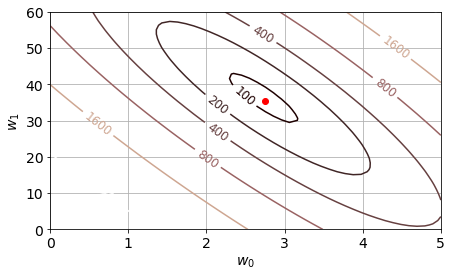

In [7]:
# 図3-6　本書での掲載はなし
def show_mse_1st():
    w0_reso = 50
    w1_reso = 50
    w0s = np.linspace(0, 5, w0_reso)        # w0の範囲
    w1s = np.linspace(0, 60, w1_reso)       # w1の範囲
    mses = np.zeros((w1_reso, w0_reso))     # MSEを格納する2次元配列

    w0_min = -1
    w1_min = -1
    mse_min = float('inf')
    for i0 in range(w0_reso):
        for i1 in range(w1_reso):
            # MSEの計算
            mse = mse_linear_reg(xs, ts, w0s[i0], w1s[i1])
            mses[i1, i0] = mse
            if mse < mse_min:
                mse_min = mse
                w0_min = w0s[i0]
                w1_min = w1s[i1]

    # MSEが最小となるw0, w1を求める
    print(f'グリッドサーチ: w0={w0_min:.3f}, ' \
          + f'w1={w1_min:.3f} のとき最小MSE {mse_min:.3f}')

    # ww0s, ww1s = np.meshgrid(w0s, w1s)
    cont = plt.contour(                     # 等高線プロット
        w0s, w1s, mses, cmap='pink',
        levels=[100, 200, 400, 800, 1600, 3200],
        )
    cont.clabel(fmt='%.0f', fontsize=12)
    plt.scatter(w0_min, w1_min, color='r')
    plt.ylabel('$w_1$')
    plt.xlabel('$w_0$')
    plt.grid(axis='both')

show_mse_1st()


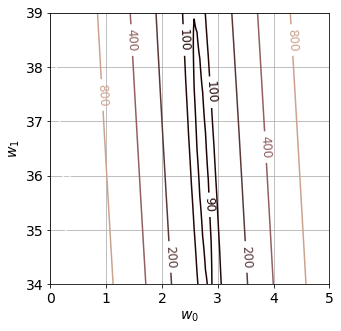

In [8]:
# list 3-1-(6) MSEの等高線表示

def show_mse():
    w0_reso = 100
    w1_reso = 100
    w0s = np.linspace(0, 5, w0_reso)         # w0の範囲 (A)
    w1s = np.linspace(34, 39, w1_reso)       # w1の範囲 (B)
    mses = np.zeros((w1_reso, w0_reso))      # MSEを格納する2次元配列 (C)

    for i0 in range(w0_reso):
        for i1 in range(w1_reso):
            # MSEの計算 (D)
            mse = mse_linear_reg(xs, ts, w0s[i0], w1s[i1])
            mses[i1, i0] = mse

    plt.figure(figsize=(5, 5))
    cont = plt.contour(                     # 等高線プロット (E)
        w0s, w1s, mses, cmap='pink',
        levels=[90, 100, 200, 400, 800, 1600],
        )
    cont.clabel(fmt='%.0f', fontsize=12)
    plt.ylabel('$w_1$')
    plt.xlabel('$w_0$')
    plt.grid(axis='both')

show_mse()
plt.show()

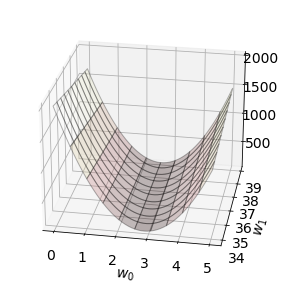

In [9]:
# 図3-7右　本書での掲載はなし

def show_mse2_surf():
    w0_reso = 50
    w1_reso = 50
    w0s = np.linspace(0, 5, w0_reso)         # w0の範囲
    w1s = np.linspace(34, 39, w1_reso)       # w1の範囲
    mses = np.zeros((w1_reso, w0_reso))      # MSEを格納する2次元配列

    for i0 in range(w0_reso):
        for i1 in range(w1_reso):
            # MSEの計算
            mse = mse_linear_reg(xs, ts, w0s[i0], w1s[i1])
            mses[i1, i0] = mse

    ww0s, ww1s = np.meshgrid(w0s, w1s)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    ax.plot_surface(                         # 3Dグラフ
        ww0s, ww1s, mses, cmap='pink',
        alpha=0.3,
        rstride=5, cstride=5, edgecolor='black',
        )
    ax.view_init(elev=25, azim=-80)
    plt.ylabel('$w_1$')
    plt.xlabel('$w_0$')
    plt.grid(axis='both')
    
show_mse2_surf()

In [10]:
# list 3-1-(7) dw0, dw1を求める関数

def dw_linear_reg(xs, ts, w0, w1):
    ys = w0 * xs + w1
    dw0 = -2 * np.mean((ys - ts) * xs)  # 式(3-6)  (A)
    dw1 = -2 * np.mean(ys - ts)         # 式(3-7)  (B)
    return dw0, dw1

dw0, dw1 = dw_linear_reg(xs, ts, 1, 38) # (C)
print(f'dw0={dw0:.1f}, dw1={dw1:.1f}')

dw0=773.8, dw1=42.6


勾配法: w0=2.726, w1=36.234 のとき最小MSE 88.236


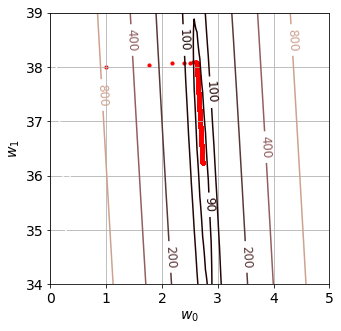

In [11]:
# list 3-1-(8) 勾配法

alpha = 0.001   # 学習率 (A)
init_w0 = 1.0   # w0の初期値 (B) 
init_w1 = 38.0  # w1の初期値 (C)
w0s = [init_w0] # w0をリストw0sで保存していく準備、初めの値をセット
w1s = [init_w1] # w1をリストw1sで保存していく準備
first_mse = mse_linear_reg(xs, ts, w0=init_w0, w1=init_w1)
mses = [first_mse] # mseをリストmsesで保存していく準備
# 勾配法のループ (D)
for i in range(10000):
    dw0, dw1 = dw_linear_reg(xs, ts, w0s[-1], w1s[-1]) # (E)
    new_w0 = w0s[-1] + alpha * dw0 # w0の更新 (F)
    new_w1 = w1s[-1] + alpha * dw1 # w1の更新 (G)
    w0s.append(new_w0)  # (H)
    w1s.append(new_w1)  # (I)
    new_mse = mse_linear_reg(
        xs, ts, w0=w0s[-1], w1=w1s[-1]) # MSEの計算 (J) 
    mses.append(new_mse) # (K)

# 結果の表示 (L)
print(f'勾配法: w0={w0s[-1]:.3f}, w1={w1s[-1]:.3f}' \
      + f' のとき最小MSE {mses[-1]:.3f}')
show_mse()
plt.scatter(w0s, w1s, c='r', s=10)
plt.show()

最小MSE = 88.24


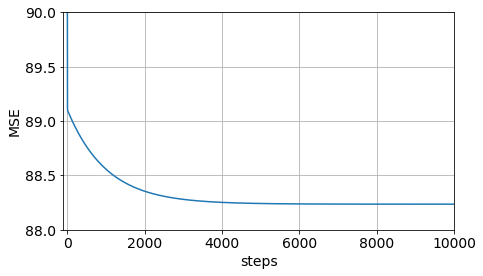

In [12]:
# list 3-1-(9) 学習曲線

print(f'最小MSE = {mses[-1]:.2f}')
plt.plot(mses)
plt.ylim(88, 90)
plt.xlim(-100, 10000)
plt.xlabel('steps')
plt.ylabel('MSE')
plt.grid(axis='both')
plt.show()

勾配法: w0=2.726, w1=36.234 のとき最小MSE 88.236


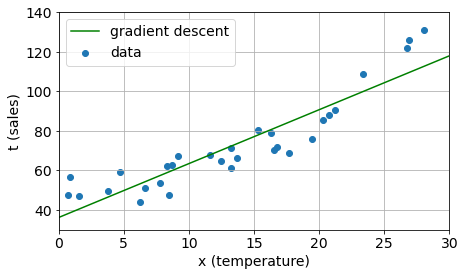

In [13]:
# list 3-1-(10) 勾配法による線形回帰モデルのフィッティング

print(f'勾配法: w0={w0s[-1]:.3f}, w1={w1s[-1]:.3f}' \
      + f' のとき最小MSE {mses[-1]:.3f}')
xs_pred = np.linspace(x_range[0], x_range[1], 50)
ys_pred = linear_reg(xs_pred, w0=w0s[-1], w1=w1s[-1])
plt.scatter(xs, ts, label='data')
plt.plot(xs_pred, ys_pred, 'green', label='gradient descent')
plt_setting()
plt.show()

In [14]:
# list 3-1-(11) ムーア・ペンローズの疑似逆行列

X = np.c_[xs, np.ones(len(xs))]                      # Xを作成 (A)
w = np.linalg.inv(X.T @ X) @ X.T @ ts.reshape(-1, 1) # 公式でwを求める (B)
w = w.reshape(-1)                                    # 1次元に戻す (C) 

In [15]:
# list 3-1-(12) MSEの計算

mse = mse_linear_reg(xs, ts, w0=w[0], w1=w[1])
print(f'解析解: w0={w[0]:.3f}, w1={w[1]:.3f}' +
      f' のとき最小MSE {mse:.3f}')

解析解: w0=2.726, w1=36.221 のとき最小MSE 88.236
